In [1]:
# Get Data 
import pandas as pd

inputFolder='C:\\Users\\ebayrakt\\Documents\\Bayer\\DataScienceInterview\\Workspace\\InputData\\'
outputFolder='C:\\Users\\ebayrakt\\Documents\\Bayer\\DataScienceInterview\\Workspace\\OutputData\\'

fid = inputFolder+'sentences_with_sentiment.xlsx'
dataSentiment = pd.read_excel(fid, sheet_name=None)
dataSentiment_org = dataSentiment.copy()
print(fid+'\n \tis read!')
dataSentiment_org.info()

C:\Users\ebayrakt\Documents\Bayer\DataScienceInterview\Workspace\InputData\sentences_with_sentiment.xlsx
 	is read!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 5 columns):
ID          266 non-null int64
Sentence    266 non-null object
Positive    266 non-null int64
Negative    266 non-null int64
Neutral     266 non-null int64
dtypes: int64(4), object(1)
memory usage: 10.5+ KB


In [2]:
# Create polarity data
x = dataSentiment

x.drop('ID', axis=1, inplace=True)

x.loc[x['Positive']==1, 'Polarity'] =  1
x.loc[x['Neutral']==1,  'Polarity'] =  0
x.loc[x['Negative']==1, 'Polarity'] = -1
x['Polarity']=x['Polarity'].astype(int)

dataSentiment.head()

,Sentence,Positive,Negative,Neutral,Polarity
0,The results in 2nd line treatment show an ORR ...,1,0,0,1
1,The long duration of response and high durable...,1,0,0,1
2,The median OS time in the updated results exce...,0,0,1,0
3,"Therefore, the clinical benefit in 2nd line tr...",1,0,0,1
4,"The data provided in 1st line, although prelim...",1,0,0,1


 1    160
 0     70
-1     36
Name: Polarity, dtype: int64


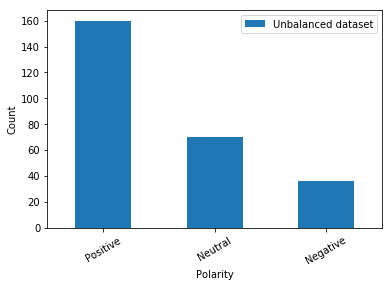

In [3]:
# Check whether dataset is balanced or not
import matplotlib.pyplot as plt

print(x['Polarity'].value_counts())
ax=x['Polarity'].value_counts().plot(kind='bar')
ax.set_xticklabels( ['Positive','Neutral', 'Negative'],rotation=30)
ax.set_xlabel('Polarity')
ax.set_ylabel('Count')
ax.legend(['Unbalanced dataset'])
plt.show()

In [4]:
import nltk 
# Convert Sentece to type of string, just in case
x['Sentence'] = x['Sentence'].astype(str)

# 1. Step of data cleaning: Tokenize with removing punctuations and lowercasing 
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+') # this keeps only sequences of alphanumeric characters 

x['Tokenized'] = x['Sentence'].apply(lambda x:tokenizer.tokenize(x.lower()))
x.head(3)

,Sentence,Positive,Negative,Neutral,Polarity,Tokenized
0,The results in 2nd line treatment show an ORR ...,1,0,0,1,"[the, results, in, 2nd, line, treatment, show,..."
1,The long duration of response and high durable...,1,0,0,1,"[the, long, duration, of, response, and, high,..."
2,The median OS time in the updated results exce...,0,0,1,0,"[the, median, os, time, in, the, updated, resu..."


In [5]:
# 2. Step of data cleaning: removing the noise, common words
stopwordEN=nltk.corpus.stopwords.words('english') # Here better to define a custom stopword list, e.g. "%" will be removed. 

x['TokensWoStopwords'] = x['Tokenized'].apply(lambda tokens: [token for token in tokens if token not in stopwordEN])
x.head(3)

,Sentence,Positive,Negative,Neutral,Polarity,Tokenized,TokensWoStopwords
0,The results in 2nd line treatment show an ORR ...,1,0,0,1,"[the, results, in, 2nd, line, treatment, show,...","[results, 2nd, line, treatment, show, orr, 33,..."
1,The long duration of response and high durable...,1,0,0,1,"[the, long, duration, of, response, and, high,...","[long, duration, response, high, durable, resp..."
2,The median OS time in the updated results exce...,0,0,1,0,"[the, median, os, time, in, the, updated, resu...","[median, os, time, updated, results, exceeded,..."


In [6]:
# 3. Step Lemmatization with POS tags.

from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer 

# mapper for nltk.pos_tag --> WordNetLemmatizer 
def postag2Wordnet(token): 
    tag = nltk.pos_tag([token])[0][1][0].lower()
    tag_dict = {"j": wordnet.ADJ,
                "n": wordnet.NOUN,
                "v": wordnet.VERB,
                "r": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)


def myLmtzr(tokens):
    temp = ' '.join(WordNetLemmatizer().lemmatize(token,postag2Wordnet(token)) for token in tokens)
    return temp

print(x['TokensWoStopwords'][5])
print(myLmtzr(x['TokensWoStopwords'][5]))

x['LemmatizedSentence']=x['TokensWoStopwords'].apply(lambda tokens: myLmtzr(tokens))
dataSentiment.head(3)

['taking', 'account', 'intrinsic', 'limitation', 'single', 'arm', 'studies', 'rarity', 'disease', 'challenges', 'compare', 'results', 'data', 'historical', 'controls', 'literature', 'currently', 'available', 'data', 'deemed', 'support', 'efficacy', 'avelumab', 'pre', 'treated', 'chemotherapy', 'naïve', 'patients']
take account intrinsic limitation single arm study rarity disease challenge compare result data historical control literature currently available data deem support efficacy avelumab pre treat chemotherapy naïve patient


,Sentence,Positive,Negative,Neutral,Polarity,Tokenized,TokensWoStopwords,LemmatizedSentence
0,The results in 2nd line treatment show an ORR ...,1,0,0,1,"[the, results, in, 2nd, line, treatment, show,...","[results, 2nd, line, treatment, show, orr, 33,...",result 2nd line treatment show orr 33 patient ...
1,The long duration of response and high durable...,1,0,0,1,"[the, long, duration, of, response, and, high,...","[long, duration, response, high, durable, resp...",long duration response high durable response r...
2,The median OS time in the updated results exce...,0,0,1,0,"[the, median, os, time, in, the, updated, resu...","[median, os, time, updated, results, exceeded,...",median o time update result exceed 1 year


In [7]:
# Save the pre-processed text data
x.to_csv("SMSSpamCollection_cleaned.tsv", sep='\t')

In [9]:
# Bag-of-Words approach, within a onehotencoding, as a simple approach to provide the baseline prediction 

from sklearn.feature_extraction.text import CountVectorizer

# Create bag-of-words vectorizer
bow_vectorizer = CountVectorizer() # default values are reasonably good, e.g. no accents 

# Create bag-of-words vectors
bow_vectors = bow_vectorizer.fit_transform(x['LemmatizedSentence'])

# A blick to vector representation of first few sentences
bow_featureNames = bow_vectorizer.get_feature_names()
bow_vectors_pd = pd.DataFrame(bow_vectors.toarray(), columns=bow_featureNames)
bow_vectors_pd.head()

,00,003,010,084,09,10,100,100070,100mg,12,...,well,whereas,whether,wide,widely,within,without,world,worsen,year
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
# N-Gram, vectorizing in a bigrams(n=2) fashion

# Create bigram vectorizer
bigram_vectorizer = CountVectorizer(ngram_range=(2,2))

# Create bigram vectors
bigram_vectors = bigram_vectorizer.fit_transform(x['LemmatizedSentence'])

# A blick to vector representation of first several sentences
bigram_featureNames = bigram_vectorizer.get_feature_names()
bigram_vectors_pd = pd.DataFrame(bigram_vectors.toarray(), columns=bigram_featureNames)
bigram_vectors_pd.head(50)


,00 125,00 power,003 part,010 ass,084 09,09 100mg,10 mg,100 mg,100070 003,100mg formulation,...,without increase,without ns5a,world cohort,worsen immunogenicity,worsen toxicity,year evident,year exposure,year period,year smpc,year support
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
# TF-IDF, vectorizing within term frequency-invere document frequency
from sklearn.feature_extraction.text import TfidfVectorizer

# Create TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Create TF-IDF vectors
tfidf_vectors = tfidf_vectorizer.fit_transform(x['LemmatizedSentence'])

# A blick to vector representation of first many sentences
tfidf_featureNames = tfidf_vectorizer.get_feature_names()
tfidf_vectors_pd = pd.DataFrame(tfidf_vectors.toarray(), columns=tfidf_featureNames)
tfidf_vectors_pd.head(100)


,00,003,010,084,09,10,100,100070,100mg,12,...,well,whereas,whether,wide,widely,within,without,world,worsen,year
0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.189296,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.361824
3,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.234044
9,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000


In [44]:
# Feature engineering
import string

# in order to validate hypothesis length of sentences corelates polarity
# get the length of the senteces 
# 1) from Sentence
# 2) from lematized sentence

x['corpusLength_1'] = x['Sentence'].apply(lambda x: len(x) - x.count(' '))
x['corpusLength_2'] = x['LemmatizedSentence'].apply(lambda x: len(x) - x.count(' '))

x[['corpusLength_1','corpusLength_2']].corr()





,corpusLength_1,corpusLength_2
corpusLength_1,1.000000,0.988239
corpusLength_2,0.988239,1.000000


In [45]:
# a strong correlation between length-1 and length-2 --> stick to length-2
# x.drop(['corpusLength_1'],axis=1,inplace=True) # !! uncomment
x.rename(columns = {'corpusLength_2':'corpusLength'}, inplace=True)

lengthMax=x['corpusLength'].max()
print('Max of \t'+ str(lengthMax))
x.head(3)




Max of 	546


,Sentence,Positive,Negative,Neutral,Polarity,Tokenized,TokensWoStopwords,LemmatizedSentence,corpusLength
0,The results in 2nd line treatment show an ORR ...,1,0,0,1,"[the, results, in, 2nd, line, treatment, show,...","[results, 2nd, line, treatment, show, orr, 33,...",result 2nd line treatment show orr 33 patient ...,77
1,The long duration of response and high durable...,1,0,0,1,"[the, long, duration, of, response, and, high,...","[long, duration, response, high, durable, resp...",long duration response high durable response r...,109
2,The median OS time in the updated results exce...,0,0,1,0,"[the, median, os, time, in, the, updated, resu...","[median, os, time, updated, results, exceeded,...",median o time update result exceed 1 year,34


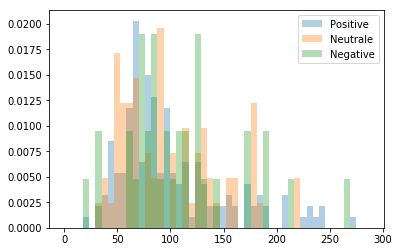

In [57]:
import numpy as np

bins = np.linspace(0,lengthMax*1.05,50)

plt.hist(x.loc[x['Polarity'] == 1,'corpusLength'],bins, alpha=0.35, normed=True, label='Positive')
plt.hist(x.loc[x['Polarity'] == 0,'corpusLength'],bins, alpha=0.35, normed=True, label='Neutrale')
plt.hist(x.loc[x['Polarity'] ==-1,'corpusLength'],bins, alpha=0.35, normed=True, label='Negative')
plt.legend(loc='upper right')
plt.show()

In [83]:
# The sentences are quite randomly distributed wrt polarity and length
# The lenght is not a good feature!

# Another hypothesis: negative polarity correlates with 
# conjective adverbs and coordinating conjuntions implying negation; such as, 
# nor, yet, but, nonetheless, nevertheless, however, otherwise, whereas

negativeWords= ['nor',' yet', 'but', 'nonetheless', 'nevertheless', 'however', 'otherwise', 'whereas']

def count_negativeWords(sentence):
    temp = 0
    for token in sentence.split(): 
        if token in negativeWords:
            temp += 1
    return temp

x['NegativeWordsCount'] = x['LemmatizedSentence'].apply(lambda x:count_negativeWords(x))
#.apply(lambda tokens: token for token in tokens if token in stopwordEN]

print(x[['NegativeWordsCount','Polarity']].corr())
print(x.loc[:,['Polarity','NegativeWordsCount']].groupby('Polarity').sum())
x.drop(['corpusLength','NegativeWordsCount'], axis=1, inplace=True)
 

                    NegativeWordsCount  Polarity
NegativeWordsCount             1.00000  -0.15244
Polarity                      -0.15244   1.00000
          NegativeWordsCount
Polarity                    
-1                         4
 0                         6
 1                         4


## Looking at the results above, the created features are not explenatory 

## Go on with creating classifiers.
1) Since the dataset is small, do cross-validation
2) Since the dataset is unbalanced 
    i)    do stratified sampling
    ii)   use support vector machines with weight, one weight per polarity. Convention: negative has wight one, the others           scale inverse proportional with their frequency. Weight_positive(neutrale) = N_negative/N_positive(neutrale) so           all weights <= 1 
    iii)  use decision tree with class weight is "balanced".
 


In [106]:
# Baseline classifier: logit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, accuracy_score, auc
from sklearn.cross_validation import StratifiedKFold

y=x.Polarity.values # labels are always same

cv_stratified = StratifiedKFold(y, n_folds=5, shuffle=True) # get stratified

def logitPerformance(X,modelName):
    print(2*'\t' + 4*'-' + modelName + 4*'-')

    for c in [0.01, 0.05, 0.25, 0.5, 0.75, 1] : 
        my_classifier = LogisticRegression(C=c)
        mean_score=0  
        for i, (train, test) in enumerate(cv_stratified): 
            my_classifier.fit(X[train], y[train])
            mean_score += accuracy_score(y[test], my_classifier.predict(X[test]))
        mean_score /= i+1
        print ("Mean accuracy for C=%s: %s" 
       % (c, mean_score))
    return mean_score
    
# i) with Baseline vectorizer: bag-of-words
logitPerformance(bow_vectors,'Logit with BOW') 
# ii) N-Gram, N=2 vectorizer
logitPerformance(bigram_vectors,'Logit with bigram') 
# iii) TF-IDF
logitPerformance(tfidf_vectors,'Logit with TF-IDF') 


		----Logit with BOW----
Mean accuracy for C=0.01: 0.601537386443
Mean accuracy for C=0.05: 0.609154437456
Mean accuracy for C=0.25: 0.707058001398
Mean accuracy for C=0.5: 0.703494060098
Mean accuracy for C=0.75: 0.718518518519
Mean accuracy for C=1: 0.714814814815
		----Logit with bigram----
Mean accuracy for C=0.01: 0.601537386443
Mean accuracy for C=0.05: 0.616631726066
Mean accuracy for C=0.25: 0.691893780573
Mean accuracy for C=0.5: 0.695667365479
Mean accuracy for C=0.75: 0.691963661775
Mean accuracy for C=1: 0.695737246681
		----Logit with TF-IDF----
Mean accuracy for C=0.01: 0.601537386443
Mean accuracy for C=0.05: 0.601537386443
Mean accuracy for C=0.25: 0.601537386443
Mean accuracy for C=0.5: 0.601537386443
Mean accuracy for C=0.75: 0.605310971349
Mean accuracy for C=1: 0.609084556254


0.60908455625436753

## Logit performance

1) Simple bag-of-word approach works reasonably fine with relatively high C values about 0.75, bigram vectorizer has a comparable performance whereas TF-IDF is not satisfactory at all!
    Conclusion: Choose bag of words with a high C value, ~0.8, for the sake of simplicity and reduced computational cost.   

In [108]:
# Linear SVM classifier: good for complex dataset with fewer instances than features, with a linear kernel computationaly efficient
# Moreover, with defining sampling weights, unblanced datasets can be better handeled.

from sklearn import svm

def linearSvcPerformance(X,modelName):
    print(2*'\t' + 4*'-' + modelName + 4*'-')

    for c in [0.01, 0.05, 0.25, 0.5, 0.75, 1] : 
        my_classifier = svm.SVC(kernel='linear', C=c, class_weight='balanced')
        mean_score=0  
        for i, (train, test) in enumerate(cv_stratified): 
            my_classifier.fit(X[train], y[train])
            mean_score += accuracy_score(y[test], my_classifier.predict(X[test]))
        mean_score /= i+1
        print ("Mean accuracy for C=%s: %s" 
       % (c, mean_score))
    return mean_score
    
# i) with Baseline vectorizer: bag-of-words
linearSvcPerformance(bow_vectors,'Linear weighted SVC with BOW') 
# ii) N-Gram, N=2 vectorizer
linearSvcPerformance(bigram_vectors,'Linear weighted SVC with bigram') 
# iii) TF-IDF
linearSvcPerformance(tfidf_vectors,'Linear weighted SVC with TF-IDF') 


		----Linear weighted SVC with BOW----
Mean accuracy for C=0.01: 0.669322152341
Mean accuracy for C=0.05: 0.7035639413
Mean accuracy for C=0.25: 0.711041229909
Mean accuracy for C=0.5: 0.718378756115
Mean accuracy for C=0.75: 0.72215234102
Mean accuracy for C=1: 0.72215234102
		----Linear weighted SVC with bigram----
Mean accuracy for C=0.01: 0.639203354298
Mean accuracy for C=0.05: 0.677078965758
Mean accuracy for C=0.25: 0.677218728162
Mean accuracy for C=0.5: 0.680922431866
Mean accuracy for C=0.75: 0.680922431866
Mean accuracy for C=1: 0.680922431866
		----Linear weighted SVC with TF-IDF----
Mean accuracy for C=0.01: 0.646820405311
Mean accuracy for C=0.05: 0.601537386443
Mean accuracy for C=0.25: 0.714744933613
Mean accuracy for C=0.5: 0.71858839972
Mean accuracy for C=0.75: 0.729909154437
Mean accuracy for C=1: 0.733612858141


0.73361285814115995

##  SVM performance

1) Simple bag-of-word approach works reasonably fine with relatively high C values about 0.75, TF-IDF vectorizer has a comparable performance whereas bigram has a slightly poorer accuracy, this is contradicts to logit results!
    Conclusion: Choose bag of words with a high C value, ~0.8, for the sake of simplicity and reduced computational cost. However, TF-IDF has a slightly performance with a comprable computational cost; it is also a good candidate. 

In [108]:
# Random classifier: good for complex dataset with fewer instances than features, with a linear kernel computationaly efficient
# Moreover, with defining class weights, unblanced datasets can be better handeled.

# with providing "sample_weight" parameter, one can also weight each sample, e.g:
# in case of a disagreement of the experts on labelling the data, a weighting algo.
# can be used to evaluate weight of the labels.


from sklearn import svm

def linearSvcPerformance(X,modelName):
    print(2*'\t' + 4*'-' + modelName + 4*'-')

    for c in [0.01, 0.05, 0.25, 0.5, 0.75, 1] : 
        my_classifier = svm.SVC(kernel='linear', C=c, class_weight='balanced')
        mean_score=0  
        for i, (train, test) in enumerate(cv_stratified): 
            my_classifier.fit(X[train], y[train])
            mean_score += accuracy_score(y[test], my_classifier.predict(X[test]))
        mean_score /= i+1
        print ("Mean accuracy for C=%s: %s" 
       % (c, mean_score))
    return mean_score
    
# i) with Baseline vectorizer: bag-of-words
linearSvcPerformance(bow_vectors,'Linear weighted SVC with BOW') 
# ii) N-Gram, N=2 vectorizer
linearSvcPerformance(bigram_vectors,'Linear weighted SVC with bigram') 
# iii) TF-IDF
linearSvcPerformance(tfidf_vectors,'Linear weighted SVC with TF-IDF') 


		----Linear weighted SVC with BOW----
Mean accuracy for C=0.01: 0.669322152341
Mean accuracy for C=0.05: 0.7035639413
Mean accuracy for C=0.25: 0.711041229909
Mean accuracy for C=0.5: 0.718378756115
Mean accuracy for C=0.75: 0.72215234102
Mean accuracy for C=1: 0.72215234102
		----Linear weighted SVC with bigram----
Mean accuracy for C=0.01: 0.639203354298
Mean accuracy for C=0.05: 0.677078965758
Mean accuracy for C=0.25: 0.677218728162
Mean accuracy for C=0.5: 0.680922431866
Mean accuracy for C=0.75: 0.680922431866
Mean accuracy for C=1: 0.680922431866
		----Linear weighted SVC with TF-IDF----
Mean accuracy for C=0.01: 0.646820405311
Mean accuracy for C=0.05: 0.601537386443
Mean accuracy for C=0.25: 0.714744933613
Mean accuracy for C=0.5: 0.71858839972
Mean accuracy for C=0.75: 0.729909154437
Mean accuracy for C=1: 0.733612858141


0.73361285814115995

In [130]:
# Random forest classifier 

from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import GridSearchCV

# Do a grid Search for free-parameters: max_depth and n_estimators 
def rfPerformance(X,modelName):
    print(2*'\t' + 4*'-' + modelName + 4*'-')
    
    max_score2 =-1.0
    mean_score2=0.0
    cnt=0
    for n in [10, 25, 50, 100]:
        for depth in [10, 20, 60, 100]:
            my_classifier = RandomForestClassifier( n_estimators= n, max_depth=depth, class_weight="balanced")
            mean_score=0  

            for i, (train, test) in enumerate(cv_stratified): 
                my_classifier.fit(X[train], y[train])
                mean_score += accuracy_score(y[test], my_classifier.predict(X[test]))

            mean_score /= i+1
            print ("Mean accuracy for estimator = %s & max_depth = %s: %s" 
           % (n, depth, mean_score))
            cnt += 1
            mean_score2 += mean_score
            max_score2 = max([max_score2,mean_score])
    
    mean_score2 /= cnt
    print(30*"=")    
    print ("Mean and Max accuracy for %s = %f & %f" % (modelName, mean_score2, max_score2))
    print(30*"=")    
    
    return

# i) with Baseline vectorizer: bag-of-words
rfPerformance(bow_vectors,'Balanced Random-Forest with BOW') 
# ii) N-Gram, N=2 vectorizer
rfPerformance(bigram_vectors,'Balanced Random-Forest with bigram') 
# iii) TF-IDF
rfPerformance(tfidf_vectors,'Balanced Random-Forest with TF-IDF') 


		----Balanced Random-Forest with BOW----
Mean accuracy for estimator = 10 & max_depth = 10: 0.632564640112
Mean accuracy for estimator = 10 & max_depth = 20: 0.680782669462
Mean accuracy for estimator = 10 & max_depth = 60: 0.680852550664
Mean accuracy for estimator = 10 & max_depth = 100: 0.665688329839
Mean accuracy for estimator = 25 & max_depth = 10: 0.673445143256
Mean accuracy for estimator = 25 & max_depth = 20: 0.688469601677
Mean accuracy for estimator = 25 & max_depth = 60: 0.710971348707
Mean accuracy for estimator = 25 & max_depth = 100: 0.703354297694
Mean accuracy for estimator = 50 & max_depth = 10: 0.673445143256
Mean accuracy for estimator = 50 & max_depth = 20: 0.688120195667
Mean accuracy for estimator = 50 & max_depth = 60: 0.680782669462
Mean accuracy for estimator = 50 & max_depth = 100: 0.692173305381
Mean accuracy for estimator = 100 & max_depth = 10: 0.69608665269
Mean accuracy for estimator = 100 & max_depth = 20: 0.695807127883
Mean accuracy for estimator = 

##  RF performance

1) Simple bag-of-word and TF-IDF approaches are almost equally good, their best performance occurs for moderate values of parameters: n_estimators and max_depth, wrt our adopted grid. The performance hit slightly above 70% for the optimal parameters with TF-DIF and BOW. 


## Conclusion

1) In this prototypical NLP implimentation, weighted linear SVC provides a good trade off between accuracy and computational cost. For small unblaced datasets like we have, indeed the number of instances especially for negative polarity is very small, it shines as a good canditate to try first.

2) A big difference wrt to vectorization algorithms are not observed. Nevertheless, unigram (BOW) and TF-IDF vectorizations slightly superior to the bigram in case of Linear weighted SVC and Random Forest algorithms. As TF-IDF is more intuitive and does not cause an inflation in the number of features, it is preferable than the others.

3) Since size of the data-set has not allowed a hold-out dataset, K-fold cross validation has been adopted and served well for our purposes. 

4) Unfortunately, advance algorithms as SVM or Random Forest has not provided much improved results than logistic regression, our prediction occurcy remained max ~73%.  